In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

In [242]:
x=np.arange(-6E-26,6E-26, 1E-27)
X, Y = np.meshgrid(x,x)
cyl_rad = 3E-26
cyl_x = []
cyl_y = []
for theta in np.linspace(0, 2*np.pi,120):
    cyl_x.append(cyl_rad*np.sin(theta))
    cyl_y.append(cyl_rad*np.cos(theta))

#checking for points inside and ouside shape
x0, y0 = 0,0
r = np.sqrt((X - x0)**2 + (Y - y0)**2)
outside = r > cyl_rad
inside = r <= cyl_rad

In [ ]:
#calculating B-field (x&y components) both inside and oustide ;)
eps = 8.85418782E-12 #F/m
m = 9.10938356E-31 #kg
c = 2.99792458E8 #m/s
n_s = 8.46E28 #m^-1 (this is for copper)
lambda_L = np.sqrt((eps*m*c**2)/(n_s))
x = np.sqrt((cyl_rad - r)**2) * np.cos(theta)

B_tot = []
for i in range(len(X)):
    for j in range(len(X[i])):
        if(np.abs(X[i][j]) <= cyl_rad):
            B_tot.append(B_0*np.exp(-x[j]/lambda_L))
        else:
            B=[]
            for i in range(0,120):
                B.append(1)
            B_tot.append(B)
print(B_tot)

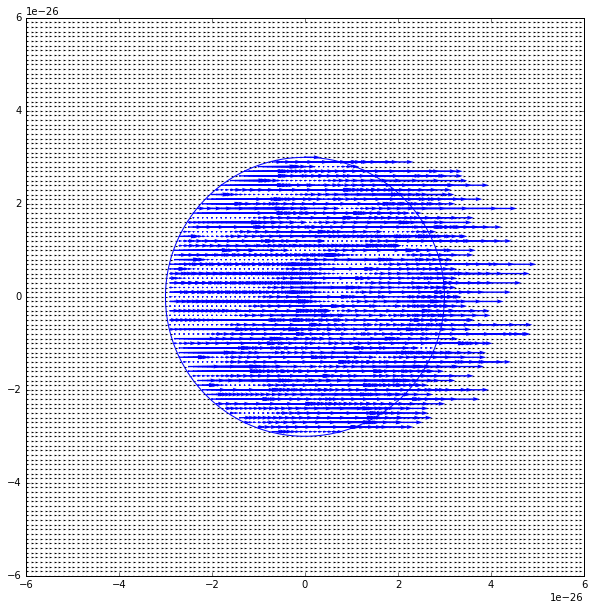

In [285]:
#printing the vector field & shape, looking down on a cylinder
plt.figure(1,figsize=(10,10))
plt.quiver(X[outside],Y[outside],B_0,0)
plt.quiver(X[inside], Y[inside], B_in,0, color = 'blue')
plt.plot(cyl_x, cyl_y, color = 'blue')

ValueError: setting an array element with a sequence.

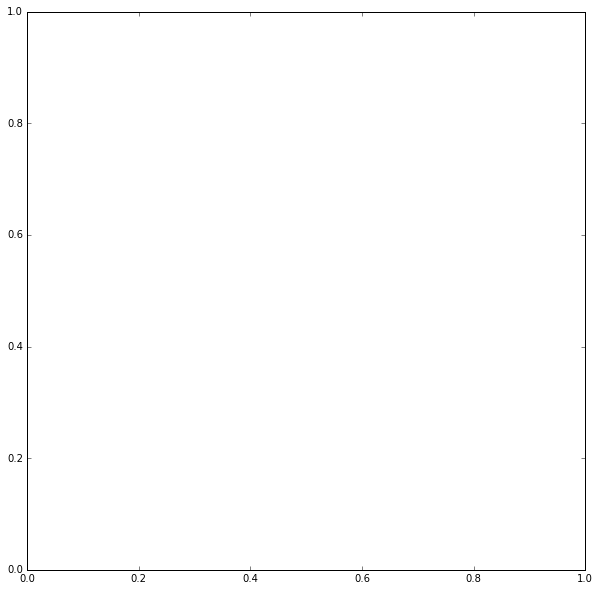

In [286]:
plt.figure(2, figsize=(10,10))
plt.plot(X[60], B_tot)
plt.ylim(0,1.1)
plt.ylabel(r"B-field [T]")
plt.xlabel(r"radius")